In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os
print(os.listdir("../samples"))

['.git', '.ipynb_checkpoints', 'board game review.ipynb', 'games.csv', 'patent documents', 'SGD classifier.ipynb', 'train_data.csv', 'Untitled.ipynb']


In [2]:
train = pd.read_csv('train_data.csv')

In [3]:
train.describe


<bound method NDFrame.describe of         id first_ipc_mark_section
0        0                      A
1        1                      G
2        2                      A
3        3                      A
4        4                      D
5        5                      A
6        6                      A
7        7                      A
8        8                      A
9        9                      A
10      10                      A
11      11                      F
12      12                      E
13      13                      G
14      14                      A
15      15                      A
16      16                      G
17      17                      E
18      18                      B
19      19                      B
20      20                      B
21      21                      B
22      22                      A
23      23                      G
24      24                      B
25      25                      B
26      26                      A
27      27    

In [4]:
train.columns

Index(['id', 'first_ipc_mark_section'], dtype='object')

In [5]:
train.shape

(3972, 2)

In [9]:
x = train
y = train['first_ipc_mark_section']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=100)
print(X_train.head())
print(X_test.head())
print(y_train.head())




        id first_ipc_mark_section
1866  1866                      C
888    888                      F
490    490                      A
1767  1767                      A
2329  2329                      B
        id first_ipc_mark_section
2697  2697                      C
2750  2750                      A
3839  3839                      A
3932  3932                      A
726    726                      F
1866    C
888     F
490     A
1767    A
2329    B
Name: first_ipc_mark_section, dtype: object


In [14]:
X_train.head()

,id,first_ipc_mark_section
1866,1866,C
888,888,F
490,490,A
1767,1767,A
2329,2329,B


In [15]:
X_train.shape

(3177, 2)

In [16]:
X_test.shape

(795, 2)

In [37]:
y_train.shape

(3177,)

In [17]:
y_test.shape

(795,)

In [18]:
X_train['filename'] = ['../samples/patent documents/'] + X_train['id'].astype(str) + ['.txt']
X_train.head()

C:\Users\hemesh talluri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,first_ipc_mark_section,filename
1866,1866,C,../samples/patent documents/1866.txt
888,888,F,../samples/patent documents/888.txt
490,490,A,../samples/patent documents/490.txt
1767,1767,A,../samples/patent documents/1767.txt
2329,2329,B,../samples/patent documents/2329.txt


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes 
from nltk.stem.snowball import SnowballStemmer
from sklearn.linear_model import SGDClassifier

stemmer = SnowballStemmer("english", ignore_stopwords=True)

class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])


tfidf = StemmedTfidfVectorizer(input='filename', encoding='iso8859-1', stop_words='english')
text_clf_svm = Pipeline([('tfidf', tfidf),
                      ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-3, max_iter=100, random_state=42))])

In [21]:
second_baseline_scores = cross_val_score(text_clf_svm, X_train['filename'], X_train['first_ipc_mark_section'], cv=5, scoring='f1_micro')
second_baseline_scores.mean()

0.6966019090315566

In [22]:
text_clf_svm.fit(X_train['filename'], X_train['first_ipc_mark_section'])

Pipeline(memory=None,
     steps=[('tfidf', StemmedTfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
            dtype=<class 'numpy.int64'>, encoding='iso8859-1',
            input='filename', lowercase=True, max_df=1.0,
            max_features=None, min_df=1, ngram_range=(1, 1), norm='l2',
            p...ty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False))])

In [24]:
X_test['filename'] = ['../samples/patent documents/'] + X_test['id'].astype(str) + ['.txt']
X_test.head()

C:\Users\hemesh talluri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,first_ipc_mark_section,filename
2697,2697,C,../samples/patent documents/2697.txt
2750,2750,A,../samples/patent documents/2750.txt
3839,3839,A,../samples/patent documents/3839.txt
3932,3932,A,../samples/patent documents/3932.txt
726,726,F,../samples/patent documents/726.txt


In [25]:
X_test['first_ipc_mark_section'] = text_clf_svm.predict(X_test['filename'])
X_test.head()

C:\Users\hemesh talluri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,first_ipc_mark_section,filename
2697,2697,C,../samples/patent documents/2697.txt
2750,2750,A,../samples/patent documents/2750.txt
3839,3839,A,../samples/patent documents/3839.txt
3932,3932,A,../samples/patent documents/3932.txt
726,726,F,../samples/patent documents/726.txt


In [27]:
X_test['first_ipc_mark_section'].value_counts()

A    317
G    151
C    148
E     50
H     50
B     47
F     32
Name: first_ipc_mark_section, dtype: int64

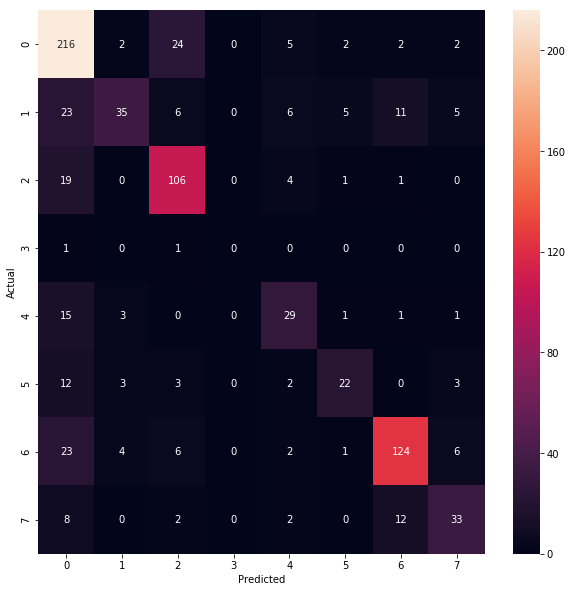

In [29]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,X_test['first_ipc_mark_section'])
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
